In [11]:
import json
import pandas as pd
import numpy as np
import urllib.request
import requests
import json_helper

In [12]:

j=1

for i in range(2):
    url = " https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2018-01-01&enddate=2018-01-31&offset="+str(j)+"&limit=1000"
    my_headers = {'Accept':'*/*', 'Accept-Encoding':'gzip,deflate,br', 'Connection':'keep-alive', 'token': 'azIHEAtmyoUhqJMPraoaafDZPfZmXPSF'}
    response = requests.get(url, headers=my_headers)
    data = response.json()
    jsonFile = open("./data/daily_summaries/daily_summaries_FIPS10003_jan_2018_"+str(i)+".json","w")
    json.dump(data, jsonFile)
    jsonFile.close()
    j+=1000

In [13]:
# use json_helper to load all json objects into a dataframe called df_daily_summaries
df_daily_summaries=json_helper.load_dataframe()

In [14]:
# display a summary of df_daily_summaries
df_daily_summaries

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1DENC0001,",,N,",0
1,2018-01-01T00:00:00,SNWD,GHCND:US1DENC0001,"T,,N,",0
2,2018-01-01T00:00:00,PRCP,GHCND:US1DENC0002,",,N,",0
3,2018-01-01T00:00:00,SNOW,GHCND:US1DENC0002,",,N,",0
4,2018-01-01T00:00:00,SNWD,GHCND:US1DENC0002,"T,,N,",0
...,...,...,...,...,...
164,2018-01-31T00:00:00,TMIN,GHCND:USW00013781,",,W,2400",-93
165,2018-01-31T00:00:00,WDF2,GHCND:USW00013781,",,W,",320
166,2018-01-31T00:00:00,WDF5,GHCND:USW00013781,",,W,",310
167,2018-01-31T00:00:00,WSF2,GHCND:USW00013781,",,W,",89


How many stations are there in total for FIPS10003

In [20]:
df_daily_summaries['station'].nunique()

17

Create a DataFrame called temps_max that only contains the entries from df_daily_summaries where the datatype column is equal to TMAX. This DataFrame should only retain the date column and the value column.

In [21]:
temps_max=df_daily_summaries[(df_daily_summaries['datatype']=='TMAX')]
temps_max=temps_max[['date','value']]

In [22]:
temps_max

,date,value
35,2018-01-01T00:00:00,-60
75,2018-01-02T00:00:00,-38
117,2018-01-03T00:00:00,-5
165,2018-01-04T00:00:00,-21
205,2018-01-05T00:00:00,-82
237,2018-01-06T00:00:00,-88
273,2018-01-07T00:00:00,-71
309,2018-01-08T00:00:00,6
336,2018-01-09T00:00:00,78
373,2018-01-10T00:00:00,56


How many entries are there in the temps_max DataFrame? What are the mean, min, and max values?

In [23]:
temps_max.shape

(31, 2)

In [25]:
temps_max.describe()

,value
count,31.000000
mean,48.193548
std,77.768640
min,-88.000000
25%,-2.500000
50%,39.000000
75%,125.000000
max,172.000000


Let's graph this DataFrame so we can get a visual representation for this information.

In [26]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [27]:
%matplotlib inline

In [28]:
x = temps_max['date'].str[8:10]
y = temps_max['value'] / 10

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Max Temperatues Jan 2018')]

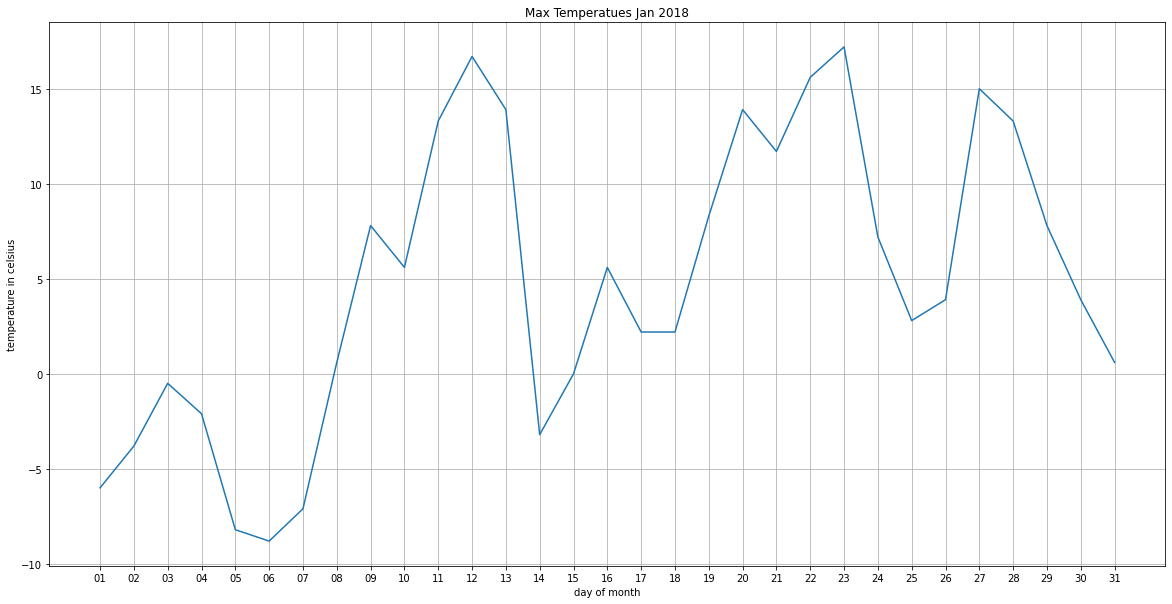

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Max Temperatues Jan 2018')

Create a DataFrame called temps_min that only contains the entries from df_daily_summaries where the datatype column is equal to TMIN. This DataFrame should only retain the date column and the value column.

In [35]:
temps_min=df_daily_summaries[(df_daily_summaries['datatype']=='TMIN')]

In [36]:
temps_min=temps_min[['date','value']]
temps_min

,date,value
36,2018-01-01T00:00:00,-149
76,2018-01-02T00:00:00,-116
118,2018-01-03T00:00:00,-132
166,2018-01-04T00:00:00,-93
206,2018-01-05T00:00:00,-121
238,2018-01-06T00:00:00,-138
274,2018-01-07T00:00:00,-166
310,2018-01-08T00:00:00,-105
337,2018-01-09T00:00:00,-60
374,2018-01-10T00:00:00,-49


How many entries are there in the temps_min DataFrame? What are the mean, min, and max values?

In [37]:
temps_min.shape

(31, 2)

In [38]:
temps_min.describe()

,value
count,31.000000
mean,-55.225806
std,65.749378
min,-166.000000
25%,-102.000000
50%,-66.000000
75%,-24.000000
max,83.000000


Graph the temps_min DataFrame

In [39]:
x=temps_min['date'].str[8:10]
y=temps_min['value']/10

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Min Temperatues Jan 2018')]

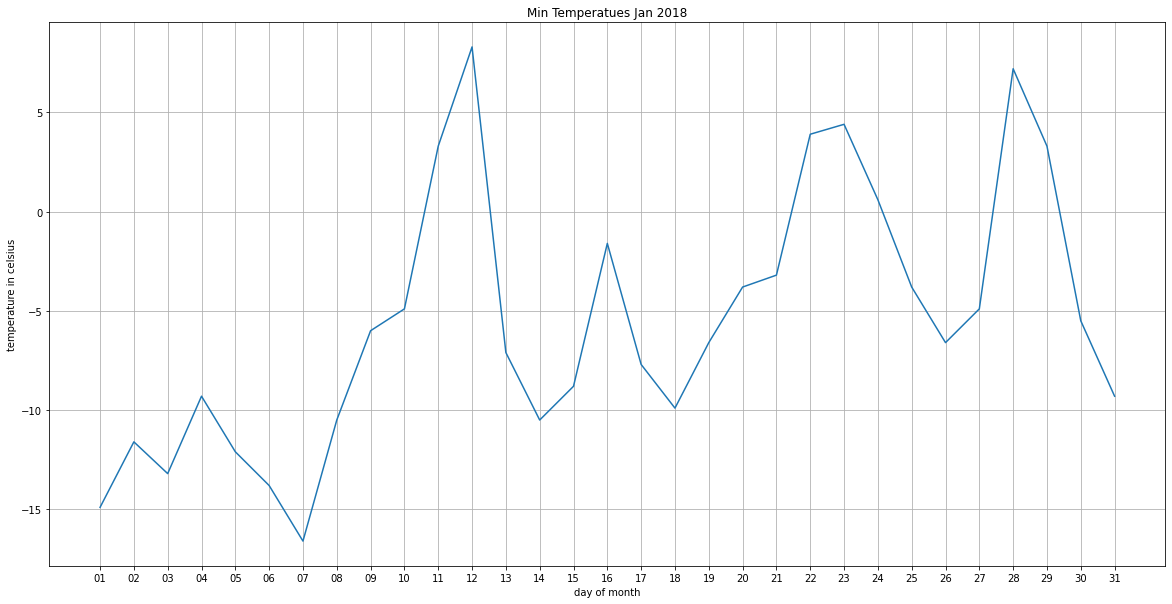

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min Temperatues Jan 2018')

We can also plot both of these lines in the same graph.

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Min & Max Temperatues Jan 2018')]

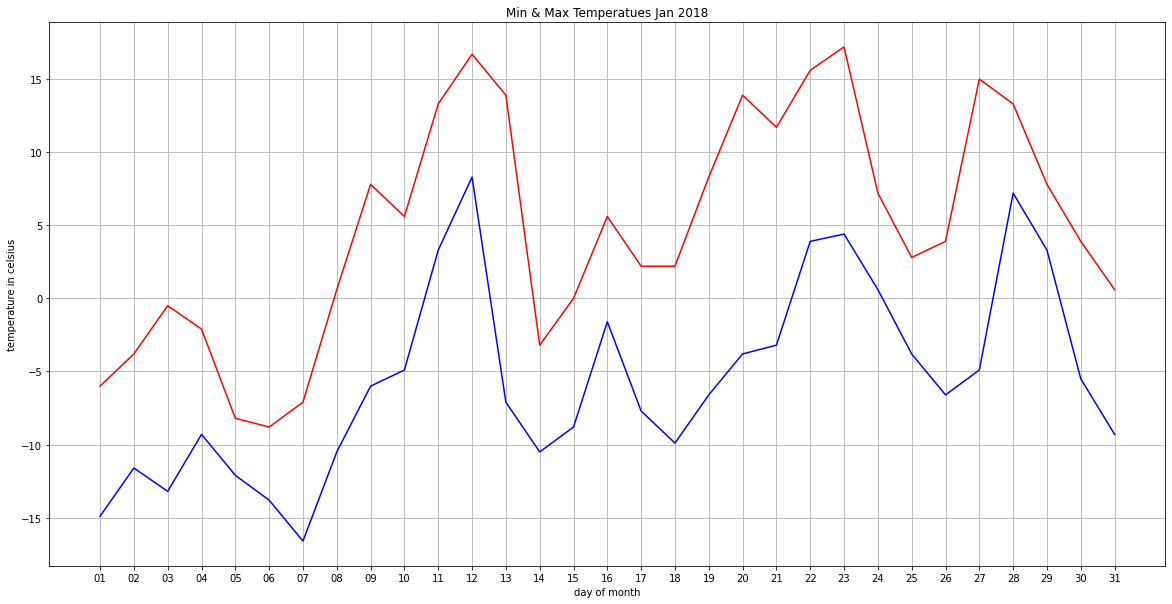

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, temps_max['value'] / 10, color='red')
ax.plot(x, temps_min['value'] / 10, color='blue')
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min & Max Temperatues Jan 2018')